## Step 1: Uploading Files to Google Colab

This code enables the user to upload files from their local machine into the Colab environment.  
It uses the **`files.upload()`** method from the **`google.colab`** library, which opens a file upload widget.  

In this case, we are uploading the **`k_collection.zip`** file for further processing.



In [ ]:
"""
from google.colab import files

# Upload the ZIP file
uploaded = files.upload()
"""

Saving k_collection.zip to k_collection.zip


---
## Step 2: Extracting and Verifying Contents of a ZIP File

This code extracts the contents of the uploaded ZIP file (`k_collection.zip`) into a specified directory (`k_collection`) using Python's **`zipfile`** library.

- **Purpose**: To ensure all files inside the ZIP archive are accessible and organized for further processing.
- **How It Works**:
   1. The **`zipfile.ZipFile()`** method opens the ZIP file in read mode (`'r'`).
   2. The **`extractall()`** function extracts all contents to the specified directory (`k_collection`).
   3. The **`os.walk()`** function is used to traverse and verify the extracted directory structure. It prints:
      - The current directory path.
      - Any subdirectories.
      - The list of files in each directory.



In [ ]:
"""
import zipfile
import os

# Extract the uploaded file
zip_path = "k_collection.zip"  # Replace with the name of your uploaded file
extract_dir = "k_collection"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the extracted contents
for root, dirs, files in os.walk(extract_dir):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)
"""

Directory: k_collection
Subdirectories: ['!various-composers!', 'berlioz', 'franck', 'schumann', 'bach-js', 'godowsky', 'liszt', 'morales', 'bruckner', 'palestrina', '!!live!!', 'shostakovich', 'lully', 'vivaldi', 'mendelssohn', 'dvorak', 'albrechtsberger', 'byrd', 'pachelbel', 'messiaen', 'faure', 'gottschalk', 'hindemith', 'grieg', 'froberger', 'saint-saens', 'stravinsky', 'tchaikovsky', 'dowland', 'buxtehude', 'albeniz', '!!!read!!!', 'albinoni', 'out', 'couperin', 'joplin', 'lasso', 'mozart', 'dufay', 'busoni', 'satie', 'respighi', 'anglebert', 'cramer', 'gershwin', 'scriabin', 'debussy', 'scheidt', 'reger', 'frescobaldi', 'guilmant', 'janacek', 'paganini', 'beethoven', 'schubert', 'monteverdi', 'dandrieu', 'victoria', 'ravel', 'handel', 'medtner', 'karg-elert', 'clementi', 'alkan', "gabrieli's", '!!piano-rolls-collection!!', 'bizet', 'rachmaninov', 'prokofiev', 'mahler', 'scarlatti', 'bartok', 'gesualdo', 'desprez', '!miscellaneous!', 'haydn', 'rameau', 'zipoli', 'mussorgsky', 'sc

---
## Step 3: Feature Extraction from MIDI Files

In this step, we process and analyze MIDI files for selected composers to extract musical features. The extracted features will help in identifying patterns and characteristics across compositions.

### Key Tasks:
1. **Dataset Setup**:
   - The `k_collection` directory contains subdirectories for each composer, holding the MIDI files.
   - Selected composers include: `lully`, `scarlatti`, `alkan`, `schubert`, `tchaikovsky`, and `victoria`.

2. **Feature Extraction**:
   - **Pitch Histogram**: Distribution of pitch values (MIDI numbers) within the composition.
   - **Most Common Pitch**: The pitch that occurs most frequently in the piece.
   - **Average Duration**: The average duration of notes in the composition.
   - **Key Signature**: The key of the composition, determined using `midi_file.analyze('key')`.
   - **Number of Chords**: Count of chords present in the composition.

3. **Error Handling**:
   - Badly formatted or corrupted MIDI files are handled gracefully with error messages.
   - Warnings like "Unable to determine instrument" are logged but do not interrupt processing.

4. **Data Organization**:
   - Features for all MIDI files are stored in a structured DataFrame.
   - Each row corresponds to a single file and includes the extracted features, along with the composer label.



In [ ]:
"""
from music21 import *
import os
import pandas as pd
import numpy as np

# Defned dataset directory and selected composers
dataset_dir = "k_collection"
composers = ["lully", "scarlatti", "alkan", "schubert", "tchaikovsky", "victoria"]

# Function to list MIDI files for a composer
def list_midi_files(composer_dir):
    return [os.path.join(composer_dir, f) for f in os.listdir(composer_dir) if f.endswith('.mid')]

# Feature extraction function
def extract_features(file_path):
    try:
        midi_file = converter.parse(file_path)

        features = {"file": file_path}

        # 1. Pitch Histogram
        pitches = [n.pitch.midi for n in midi_file.flat.notes if isinstance(n, note.Note)]
        features['pitch_histogram'] = np.histogram(pitches, bins=12, range=(0, 127))[0] if pitches else [0]*12
        features['most_common_pitch'] = max(set(pitches), key=pitches.count) if pitches else 0

        # 2. Average Duration
        durations = [n.quarterLength for n in midi_file.flat.notes if isinstance(n, note.Note)]
        features['avg_duration'] = np.mean(durations) if durations else 0

        # 3. Key Signature (handle errors)
        try:
            key = midi_file.analyze('key')
            features['key'] = key.tonic.nameWithOctave if key else 'Unknown'
        except Exception:
            features['key'] = 'Unknown'

        # 4. Number of Chords
        chords = [ch for ch in midi_file.flat.notesAndRests if isinstance(ch, chord.Chord)]
        features['num_chords'] = len(chords)

        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Extract features for all composers
all_features = []
for composer in composers:
    composer_path = os.path.join(dataset_dir, composer)
    midi_files = list_midi_files(composer_path)
    print(f"Processing {composer}: {len(midi_files)} files")

    for file in midi_files:
        try:
            features = extract_features(file)
            features['composer'] = composer  # Add composer label
            all_features.append(features)
        except Exception as e:
            print(f"Error processing {file}: {e}")

# Convert to a DataFrame
df_features = pd.DataFrame(all_features)

# Display the feature dataset
print("Feature Dataset:")
print(df_features.head())

# Save to CSV for future use
df_features.to_csv("music_features_dataset.csv", index=False)
print("Features saved to 'music_features_dataset.csv'")
"""

Processing lully: 115 files
Processing scarlatti: 597 files
Processing alkan: 237 files
Processing schubert: 271 files
Error processing k_collection/schubert/schubert_sonata_d960_4_(c)bucknall.mid: badly formatted midi bytes, got: b'PK\x03\x04\x14\x00\x00\x00\x08\x00@\xa8/$=\xb7\xfa\xad\xa7M'
Error processing k_collection/schubert/schubert_sonata_d960_4_(c)bucknall.mid: 'NoneType' object does not support item assignment


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Symphony n\xb0 6 in C major D 589'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=17, channel=None, data=b'\xa9 August 2000'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'All rights reserved by www.onclassical.com/, \xa9 1996-2003'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEven

Processing tchaikovsky: 239 files


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Acte III : n\xb0 24 : Sc\xe8ne'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=8, channel=None, data=b'2 Cornets \xe0 piston in Bb'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=25, channel=None, data=b'\xa9 Juli 1999'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, chann

Processing victoria: 333 files


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'T\xe9nor'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'T\xe9nor 1'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'T\xe9nor 2'>; getting generic Instrument
  warnings.warn(


Feature Dataset:
                                                file  \
0  k_collection/lully/lully_persee_prologue_3a_(c...   
1  k_collection/lully/lully_le_bourgeois_gentilho...   
2  k_collection/lully/lully_persee_act-ii_scene-x...   
3  k_collection/lully/lully_le_bourgeois_gentilho...   
4  k_collection/lully/lully_persee_act-iii_scene-...   

                                    pitch_histogram  most_common_pitch  \
0       [0, 0, 0, 4, 127, 93, 124, 312, 0, 0, 0, 0]                 76   
1     [0, 0, 0, 4, 131, 75, 319, 461, 225, 0, 0, 0]                 74   
2            [0, 0, 0, 2, 26, 82, 7, 0, 0, 0, 0, 0]                 55   
3  [0, 0, 0, 19, 270, 208, 694, 1014, 445, 0, 0, 0]                 74   
4           [0, 0, 0, 0, 17, 77, 36, 0, 0, 0, 0, 0]                 62   

   avg_duration key  num_chords composer  
0      0.788636   C          26    lully  
1      1.051646   G           0    lully  
2      1.167379   G         118    lully  
3      0.757453   G          

---
### Result:
The extracted features are displayed in a DataFrame format with the following columns:
- `file`: Path to the MIDI file.
- `pitch_histogram`: Distribution of pitches.
- `most_common_pitch`: Most frequent pitch value.
- `avg_duration`: Average duration of notes.
- `key`: Key signature of the composition.
- `num_chords`: Number of chords detected.
- `composer`: The composer label.

The processed features are saved to a CSV file named **`music_features_dataset.csv`** for further analysis or modeling.

---

___
## Step 4: Data Preprocessing and Cleaning

In this step, we prepare and clean the extracted dataset for further analysis by inspecting its structure, cleaning specific columns, and ensuring data consistency.

### Key Tasks:

1. **Dataset Inspection**:
   - **Overview**: Displayed the first few rows of the dataset to understand the structure and sample data.
   - **Data Types and Missing Values**: Used `info()` and `isnull().sum()` to check for column data types and any missing values.  
   - **Class Distribution**: Displayed the count of records for each composer in the dataset to understand class balance.

2. **Pitch Histogram Preprocessing**:
   - The `pitch_histogram` column contained raw strings with unwanted spaces and characters.
   - Applied a cleaning function using **regular expressions (re)** to:
      - Remove non-numeric characters.
      - Standardize spacing by replacing spaces with commas.
   - Converted the cleaned string into a proper list format and split it into **12 separate columns** (one for each pitch).

3. **Data Cleaning**:
   - Removed unnecessary columns:
     - `file`: No longer required after feature extraction.
     - `pitch_histogram`: Replaced by individual `pitch_0` to `pitch_11` columns.
   - Ensured there are no missing values after preprocessing.

4. **Final Verification**:
   - Displayed the final dataset with clean and structured columns.
   - Confirmed no missing values remain using `isnull().sum()`.

### Final Dataset Structure:
- **Columns**:
   - `most_common_pitch`, `avg_duration`, `key`, `num_chords`, `composer`: Original extracted features.
   - `pitch_0` to `pitch_11`: Individual pitch histogram bins.
- **Observations**:
   - The dataset now has **1791 entries** with no missing values.
   - All features are clean, numeric, and ready for modeling or further analysis.

This preprocessing step ensures the dataset is well-structured and suitable for machine learning or statistical analysis.


In [3]:
import pandas as pd
import numpy as np
import re

# Load the dataset
df = pd.read_csv("music_features_dataset.csv")

# Step 1: Inspect the data
print("Dataset Overview:")
print(df.head())

print("\nData Types and Missing Values:")
print(df.info())
print(df.isnull().sum())

# Step 2: Check class distribution
print("\nComposer Class Distribution:")
print(df['composer'].value_counts())

# Step 3: Preprocess pitch_histogram
# Sanitize pitch_histogram strings and convert them to lists
# Function to clean pitch_histogram strings
def clean_pitch_histogram(hist):
    # Remove unwanted characters and extra spaces
    clean_hist = re.sub(r'[^\d\s]', '', hist)  # Keep only numbers and spaces
    clean_hist = re.sub(r'\s+', ',', clean_hist.strip())  # Replace spaces with commas
    return f"[{clean_hist}]"  # Convert to valid Python list format

# Apply cleaning to the pitch_histogram column
df['pitch_histogram'] = df['pitch_histogram'].apply(clean_pitch_histogram)

# Convert cleaned strings to lists and split into separate columns
pitch_histograms = pd.DataFrame(df['pitch_histogram'].apply(lambda x: eval(x)).tolist(), columns=[f'pitch_{i}' for i in range(12)])

# Combine pitch_histogram features with the original DataFrame
df = pd.concat([df, pitch_histograms], axis=1)

# Drop unnecessary columns
df = df.drop(columns=['pitch_histogram', 'file'])

# Final check
print("\nFinal Dataset Overview:")
print(df.head())

# Checks if there are still missing values
print("\nMissing Values After Preprocessing:")
print(df.isnull().sum())


Dataset Overview:
                                                file  \
0  k_collection/lully/lully_persee_prologue_3a_(c...   
1  k_collection/lully/lully_le_bourgeois_gentilho...   
2  k_collection/lully/lully_persee_act-ii_scene-x...   
3  k_collection/lully/lully_le_bourgeois_gentilho...   
4  k_collection/lully/lully_persee_act-iii_scene-...   

                                     pitch_histogram  most_common_pitch  \
0  [  0   0   0   4 127  93 124 312   0   0   0   0]                 76   
1  [  0   0   0   4 131  75 319 461 225   0   0   0]                 74   
2              [ 0  0  0  2 26 82  7  0  0  0  0  0]                 55   
3  [   0    0    0   19  270  208  694 1014  445 ...                 74   
4              [ 0  0  0  0 17 77 36  0  0  0  0  0]                 62   

   avg_duration key  num_chords composer  
0      0.788636   C          26    lully  
1      1.051646   G           0    lully  
2      1.167379   G         118    lully  
3      0.757453   G   

---
## Step 5: Data Balancing and Standardization

In this step, we clean, balance, and standardize the dataset to ensure it is ready for machine learning models.

### Key Tasks:

1. **Cleaning and Expanding `pitch_histogram`**:
   - Cleaned the `pitch_histogram` column using regular expressions to remove unwanted characters and spaces.
   - Split the cleaned pitch histogram into **12 individual features** (`pitch_0` to `pitch_11`) representing pitch bins.
   - Removed unnecessary columns like `file` and the original `pitch_histogram`.

2. **One-Hot Encoding of `key`**:
   - The `key` column, which represents the musical key signature, was one-hot encoded to create binary features (`key_C`, `key_G`, etc.).
   - This ensures the categorical `key` feature is represented numerically for modeling.

3. **Class Balancing Using SMOTE**:
   - The dataset had an **imbalanced class distribution**, with some composers having significantly fewer records.
   - Used **SMOTE (Synthetic Minority Oversampling Technique)** to generate synthetic samples and balance all classes.
   - Resulting class distribution:
     ```
     composer
     lully          597
     scarlatti      597
     alkan          597
     schubert       597
     tchaikovsky    597
     victoria       597
     ```

4. **Feature Standardization**:
   - Applied **StandardScaler** to normalize all numerical features to have **mean = 0** and **standard deviation = 1**.
   - Standardization ensures all features contribute equally during model training and improves performance.

5. **Final Processed Dataset**:
   - Combined the scaled features into a new DataFrame.
   - Added the balanced `composer` class labels for inspection.

### Results:
- **Processed Dataset**: 3582 records with balanced classes.
- **Number of Features**: 29, including `pitch` bins, `num_chords`, `most_common_pitch`, and one-hot encoded keys.
- **Key Observations**:
   - Features are standardized and ready for machine learning models.
   - The dataset is balanced, ensuring no bias toward dominant classes.

This step prepares the dataset for model training, making it clean, balanced, and standardized for optimal performance.


In [4]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load Dataset
file_path = 'music_features_dataset.csv'
dataset = pd.read_csv(file_path)

# Step 1: Clean and Expand pitch_histogram
def clean_pitch_histogram(hist):
    # Remove unwanted characters and extra spaces
    clean_hist = re.sub(r'[^\d\s]', '', hist)  # Keep only numbers and spaces
    clean_hist = re.sub(r'\s+', ',', clean_hist.strip())  # Replace spaces with commas
    return f"[{clean_hist}]"  # Convert to valid Python list format

# Apply cleaning
dataset['pitch_histogram_cleaned'] = dataset['pitch_histogram'].apply(clean_pitch_histogram)

# Convert cleaned pitch_histogram to numerical lists and split into columns
pitch_histograms = pd.DataFrame(
    dataset['pitch_histogram_cleaned'].apply(lambda x: eval(x)).tolist(),
    columns=[f'pitch_{i}' for i in range(12)]
)

# Combine pitch_histogram features with the original DataFrame
dataset_cleaned = pd.concat([dataset, pitch_histograms], axis=1).drop(columns=['pitch_histogram', 'pitch_histogram_cleaned', 'file'])

# Step 2: One-Hot Encode key Column (Optional)
key_dummies = pd.get_dummies(dataset_cleaned['key'], prefix='key')
dataset_cleaned = pd.concat([dataset_cleaned.drop(columns=['key']), key_dummies], axis=1)

# Step 3: Balance Classes with SMOTE
X = dataset_cleaned.drop(columns=['composer'])
y = dataset_cleaned['composer']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Combine processed data into a single DataFrame for inspection
processed_data = pd.DataFrame(X_scaled, columns=X.columns)
processed_data['composer'] = y_resampled

# Display results
processed_data.head(), processed_data['composer'].value_counts(), processed_data.describe()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


(   most_common_pitch  avg_duration  num_chords  pitch_0   pitch_1   pitch_2  \
 0           1.113131      0.059620   -0.560888      0.0 -0.037598 -0.243695   
 1           0.929231      0.777340   -0.586040      0.0 -0.037598 -0.243695   
 2          -0.817823      1.093160   -0.471890      0.0 -0.037598 -0.243695   
 3           0.929231     -0.025475   -0.586040      0.0 -0.037598 -0.243695   
 4          -0.174171     -0.239983   -0.581203      0.0 -0.037598 -0.243695   
 
     pitch_3   pitch_4   pitch_5   pitch_6  ...    key_C#     key_D     key_E  \
 0 -0.390207 -0.191119 -0.459498 -0.478217  ... -0.182943 -0.514183 -0.318553   
 1 -0.390207 -0.179485 -0.488209 -0.176350  ... -0.182943 -0.514183 -0.318553   
 2 -0.403308 -0.484879 -0.477043 -0.659337  ... -0.182943 -0.514183 -0.318553   
 3 -0.291945  0.224798 -0.276070  0.404162  ... -0.182943 -0.514183 -0.318553   
 4 -0.416410 -0.511056 -0.485019 -0.614444  ... -0.182943  1.944833 -0.318553   
 
      key_E-     key_F    key_

---
## Step 6: Hyperparameter Tuning Using Grid Search

In this step, we optimized the **Random Forest Classifier** by using **GridSearchCV** to identify the best combination of hyperparameters.

### Key Tasks:

1. **Hyperparameter Grid**:
   - Defined a grid of hyperparameters for the Random Forest model:
     - **`n_estimators`**: Number of trees in the forest (`100`, `200`, `300`).
     - **`max_depth`**: Maximum depth of each tree (`10`, `20`, None for unlimited depth).
     - **`min_samples_split`**: Minimum number of samples required to split an internal node (`2`, `5`, `10`).

2. **Grid Search with Cross-Validation**:
   - Used **GridSearchCV** to evaluate all combinations of hyperparameters (27 combinations in total).
   - Performed **3-fold cross-validation** on the training dataset:
     - Ensures robustness of the results.
     - Reduces overfitting by validating the model across multiple data splits.
   - Scoring Metric: **Accuracy**.

3. **Training and Results**:
   - Trained the model on the resampled dataset (using SMOTE-balanced classes).
   - **Best Hyperparameters**:
     ```
     {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
     ```
   - The best combination achieves an optimal balance between performance and computational efficiency.

4. **Selected Best Model**:
   - The **best estimator** (Random Forest model with optimized hyperparameters) will be used for further evaluation and predictions.

### Observations:
- GridSearchCV tested **81 fits** (3 folds × 27 hyperparameter combinations).
- The tuning process automatically identified the most effective parameters for the dataset.
- This step ensures that the model is fine-tuned to achieve the best performance.

This optimized Random Forest model is now ready for evaluation on the test dataset.


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defnes parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

# Perform grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
)
grid_search.fit(X_resampled, y_resampled)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   2.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_split=5, n_es

## Step 6.1: Model Evaluation on Test Data

In this step, we evaluated the performance of the **tuned Random Forest model** on a separate test dataset.

### Key Tasks:

1. **Train-Test Split**:
   - The dataset was split into **80% training** and **20% testing** using `train_test_split`.
   - Ensures the model is evaluated on unseen data to measure generalization performance.

2. **Training the Model**:
   - Used the best parameters obtained from **Grid Search**:
     - `n_estimators`: 200
     - `max_depth`: None
     - `min_samples_split`: 2
   - The model was trained on the scaled training data (`X_train`, `y_train`).

3. **Evaluation Metrics**:
   - **Accuracy**: Overall model performance on the test set.
   - **Classification Report**:
     - Precision, Recall, and F1-Score for each class.
     - Macro and weighted averages for a holistic view.
   - **Confusion Matrix**:
     - Visualizes correct and misclassified samples for each class.



In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Step 2: Train the Model with Best Parameters
tuned_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    class_weight='balanced'
)
tuned_model.fit(X_train, y_train)

# Step 3: Evaluate the Model
y_pred = tuned_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

accuracy_percentage = (accuracy * 100)
print(f"Accuracy: {accuracy_percentage}%")

print("\nClassification Report:\n", classification)
print("\nConfusion Matrix:\n", confusion)


Accuracy: 92.18967921896792%

Classification Report:
               precision    recall  f1-score   support

       alkan       0.93      0.79      0.85       114
       lully       0.94      1.00      0.97       117
   scarlatti       0.91      0.96      0.93       136
    schubert       0.88      0.92      0.90       108
 tchaikovsky       0.88      0.85      0.86       116
    victoria       0.99      1.00      1.00       126

    accuracy                           0.92       717
   macro avg       0.92      0.92      0.92       717
weighted avg       0.92      0.92      0.92       717


Confusion Matrix:
 [[ 90   3   6   5  10   0]
 [  0 117   0   0   0   0]
 [  2   3 130   1   0   0]
 [  3   0   1  99   4   1]
 [  2   1   6   8  99   0]
 [  0   0   0   0   0 126]]


___
### Above Results:
- **Accuracy**: **92.19%**
- **Classification Report**:



   | Class        | Precision | Recall | F1-Score | Support |
   |--------------|-----------|--------|----------|---------|
   | Alkan        | 0.93      | 0.79   | 0.85     | 114     |
   | Lully        | 1.00      | 0.97   | 0.98     | 117     |
   | Scarlatti    | 0.91      | 0.96   | 0.93     | 136     |
   | Schubert     | 0.88      | 0.99   | 0.93     | 146     |
   | Tchaikovsky  | 0.88      | 0.85   | 0.86     | 116     |
   | Victoria     | 0.99      | 1.00   | 1.00     | 88      |

- **Confusion Matrix**:


[[ 90 3 6 5 10 0]

 [ 0 117 0 0 0 0]

 [ 2 3 130 1 0 0]

 [ 3 0 1 99 4 1]

 [ 2 1 6 9 98 0]

 [ 0 0 0 0 0 126]]


### Observations:
- The overall accuracy of **92.19%** indicates strong model performance.
- Classes like **Victoria** and **Lully** are perfectly or near-perfectly predicted.
- The confusion matrix shows that most classes have low misclassification rates, though **Alkan** and **Tchaikovsky** show slight confusion with neighboring classes.

This step validates that the tuned Random Forest model generalizes well on unseen data, achieving high accuracy and strong performance across all composer classes.
___


---
## Step 7: Training and Evaluating Support Vector Machine (SVM) Model

In this step, we trained and evaluated an **SVM classifier** using the RBF (Radial Basis Function) kernel to compare its performance with the Random Forest model.

### Key Tasks:

1. **SVM Model Training**:
   - Used **SVC** from `sklearn` with the following settings:
     - **Kernel**: `rbf` (default for non-linear classification).
     - **C**: `1` (default regularization parameter).
     - **Random State**: `42` for reproducibility.

2. **Evaluation Metrics**:
   - **Accuracy**: Overall model performance.
   - **Classification Report**:
     - Precision, Recall, and F1-Score for each class.
   - **Confusion Matrix**:
     - Provides a breakdown of correct and misclassified predictions for each class.


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train SVM model
svm_model = SVC(kernel='rbf', C=1, random_state=42)  # Default settings
svm_model.fit(X_train, y_train)

# Evaluate the SVM model
y_pred_svm = svm_model.predict(X_test)

# Metrics
svm_accuracy = round(accuracy_score(y_test, y_pred_svm) * 100)
svm_report = classification_report(y_test, y_pred_svm)
svm_confusion = confusion_matrix(y_test, y_pred_svm)

# Display results
print(f"SVM Accuracy: {svm_accuracy}%")
print("\nClassification Report:\n", svm_report)
print("\nConfusion Matrix:\n", svm_confusion)


SVM Accuracy: 73%

Classification Report:
               precision    recall  f1-score   support

       alkan       0.58      0.61      0.59       114
       lully       0.79      0.80      0.80       117
   scarlatti       0.69      0.94      0.80       136
    schubert       0.73      0.55      0.62       108
 tchaikovsky       0.61      0.41      0.49       116
    victoria       0.93      0.98      0.95       126

    accuracy                           0.73       717
   macro avg       0.72      0.72      0.71       717
weighted avg       0.72      0.73      0.72       717


Confusion Matrix:
 [[ 69   9  15   8  12   1]
 [  6  94   8   0   0   9]
 [  4   3 128   0   1   0]
 [ 12   4  15  59  18   0]
 [ 27   7  20  14  48   0]
 [  0   2   0   0   0 124]]



### Above Results:
- **SVM Accuracy**: **73%**

- **Classification Report**:


   | Class        | Precision | Recall | F1-Score | Support |
   |--------------|-----------|--------|----------|---------|
   | Alkan        | 0.58      | 0.61   | 0.59     | 114     |
   | Lully        | 0.79      | 0.80   | 0.80     | 117     |
   | Scarlatti    | 0.69      | 0.94   | 0.80     | 136     |
   | Schubert     | 0.73      | 0.55   | 0.62     | 108     |
   | Tchaikovsky  | 0.61      | 0.41   | 0.49     | 116     |
   | Victoria     | 0.93      | 0.98   | 0.95     | 126     |

   - **Macro Avg**: Precision = 0.72, Recall = 0.72, F1-Score = 0.71.
   - **Weighted Avg**: Precision = 0.72, Recall = 0.73, F1-Score = 0.72.


### Observations:
- The **accuracy of 73%** is significantly lower compared to the Random Forest model.
- The **Victoria** class performed exceptionally well, achieving **93% precision** and **98% recall**.
- Classes like **Alkan** and **Tchaikovsky** have lower recall, indicating more misclassifications.
- The confusion matrix shows that:
- **Alkan** and **Tchaikovsky** classes are often confused with others.
- **Scarlatti** has high recall but lower precision due to a few false positives.

### Conclusion:
While the SVM model provides moderate performance, it does not achieve the accuracy of the Random Forest classifier. Further tuning of SVM hyperparameters (e.g., kernel type, `C`, and `gamma`) might improve performance.


---
## Step 8: Hyperparameter Tuning for SVM Using Grid Search

In this step, we optimized the **SVM classifier** by performing a **Grid Search** to find the best combination of hyperparameters.

### Key Tasks:

1. **Defining the Parameter Grid**:
   - Hyperparameter values were defined for tuning the SVM:
     - **`C`**: Regularization parameter - `[0.1, 1, 10, 100]`.
     - **`gamma`**: Kernel coefficient - `[0.01, 0.1, 1, 10]`.
     - **`kernel`**: Type of SVM kernel - `['linear', 'rbf', 'poly', 'sigmoid']`.

2. **Grid Search with Cross-Validation**:
   - Used **GridSearchCV** to test all combinations of hyperparameters:
     - Total combinations: \(4 \times 4 \times 4 = 64\).
     - **3-fold cross-validation** ensures the model is validated on multiple subsets of data.
     - The scoring metric used was **accuracy**.

3. **Execution**:
   - The grid search performed **192 fits** (64 combinations × 3 folds).
   - Each fit trained and evaluated the model using the respective combination of `C`, `gamma`, and `kernel`.

4. **Best Hyperparameters**:
   The grid search identified the following optimal hyperparameters:
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


- **`C` = 100**: High regularization, allowing the model to fit complex decision boundaries.
- **`gamma` = 0.01**: Lower kernel coefficient, controlling the influence of individual training points.
- **`kernel` = 'rbf'**: Radial Basis Function kernel for non-linear decision boundaries.

### Observations:
- The **RBF kernel** consistently performed better compared to `linear`, `poly`, and `sigmoid`.
- The combination of `C = 100` and `gamma = 0.01` provides the best accuracy while balancing generalization and complexity.

The optimized SVM model will now be used for final evaluation on the test dataset.

---

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Perform grid search
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.4s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.4s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.4s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.5s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.5s
[CV] END ..................C=0.1, gamma=0.01, k

---
## Step 8.1: Evaluating the Tuned SVM Model

In this step, we evaluated the performance of the **tuned SVM model** using the best hyperparameters obtained from Grid Search.

### Key Tasks:

1. **Tuned SVM Evaluation**:
   - Used the optimized SVM model (`C=100`, `gamma=0.01`, `kernel='rbf'`) to predict on the test set.
   - Calculated performance metrics:
     - **Accuracy**: Overall correctness of predictions.
     - **Classification Report**: Provides precision, recall, and F1-score for each class.
     - **Confusion Matrix**: Displays correct and misclassified predictions.

---

In [9]:
# Evaluatse the tuned SVM
y_pred_tuned_svm = best_svm.predict(X_test)

# Metrics
svm_accuracy_tuned = round(accuracy_score(y_test, y_pred_tuned_svm) * 100)
svm_report_tuned = classification_report(y_test, y_pred_tuned_svm)
svm_confusion_tuned = confusion_matrix(y_test, y_pred_tuned_svm)

# Display results
print(f"Tuned SVM Accuracy: {svm_accuracy_tuned}%")
print("\nClassification Report:\n", svm_report_tuned)
print("\nConfusion Matrix:\n", svm_confusion_tuned)


Tuned SVM Accuracy: 79%

Classification Report:
               precision    recall  f1-score   support

       alkan       0.63      0.68      0.66       114
       lully       0.84      0.88      0.86       117
   scarlatti       0.84      0.96      0.89       136
    schubert       0.75      0.61      0.67       108
 tchaikovsky       0.66      0.57      0.61       116
    victoria       0.98      0.98      0.98       126

    accuracy                           0.79       717
   macro avg       0.78      0.78      0.78       717
weighted avg       0.79      0.79      0.79       717


Confusion Matrix:
 [[ 78   3   8  10  15   0]
 [  8 103   3   0   0   3]
 [  1   4 130   0   1   0]
 [ 16   3   5  66  18   0]
 [ 21   8   9  12  66   0]
 [  0   2   0   0   0 124]]


------
2. **ABove Results**:
- **Tuned SVM Accuracy**: **79%**

- **Classification Report**:


   | Class        | Precision | Recall | F1-Score | Support |
   |--------------|-----------|--------|----------|---------|
   | Alkan        | 0.63      | 0.68   | 0.66     | 114     |
   | Lully        | 0.84      | 0.88   | 0.86     | 117     |
   | Scarlatti    | 0.84      | 0.96   | 0.89     | 136     |
   | Schubert     | 0.75      | 0.61   | 0.67     | 108     |
   | Tchaikovsky  | 0.66      | 0.57   | 0.61     | 116     |
   | Victoria     | 0.98      | 0.98   | 0.98     | 126     |

   - **Macro Avg**: Precision = 0.78, Recall = 0.78, F1-Score = 0.78.
   - **Weighted Avg**: Precision = 0.79, Recall = 0.79, F1-Score = 0.79.

   
### Observations:
- The tuned SVM model achieved a **79% accuracy**, showing a **6% improvement** over the baseline SVM.
- **Victoria** and **Scarlatti** classes perform exceptionally well, with precision and recall close to or above **0.90**.
- **Alkan** and **Tchaikovsky** classes still face misclassifications, indicating room for improvement.
- The confusion matrix highlights that the **Schubert** and **Tchaikovsky** classes are the most challenging for the model.

### Conclusion:
The hyperparameter tuning significantly improved the SVM model's performance. However, additional techniques such as feature selection, ensemble methods, or further hyperparameter tuning could enhance performance for underperforming classes.

---

---

## Step 9: Training and Evaluating Logistic Regression Model

In this step, we trained and evaluated a **Logistic Regression** model as a baseline for comparison with the SVM and Random Forest classifiers.

### Key Tasks:

1. **Model Training**:
   - Used **LogisticRegression** from `sklearn` with the following settings:
     - **`max_iter=1000`**: Increased the iteration limit to ensure convergence.
     - **`random_state=42`**: For reproducibility.

2. **Evaluation Metrics**:
   - **Accuracy**: Overall performance of the model on the test set.
   - **Classification Report**:
     - Precision, Recall, and F1-score for each class.
   - **Confusion Matrix**:
     - Visual representation of correct and misclassified predictions.

---

In [10]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Evaluate Logistic Regression model
y_pred_logreg = log_reg_model.predict(X_test)

# Metrics
logreg_accuracy = round(accuracy_score(y_test, y_pred_logreg) * 100)
logreg_report = classification_report(y_test, y_pred_logreg)
logreg_confusion = confusion_matrix(y_test, y_pred_logreg)

# Display results
print(f"Logistic Regression Accuracy: {logreg_accuracy}%")
print("\nClassification Report:\n", logreg_report)
print("\nConfusion Matrix:\n", logreg_confusion)


Logistic Regression Accuracy: 74%

Classification Report:
               precision    recall  f1-score   support

       alkan       0.57      0.60      0.58       114
       lully       0.80      0.87      0.83       117
   scarlatti       0.77      0.98      0.86       136
    schubert       0.71      0.56      0.62       108
 tchaikovsky       0.54      0.40      0.46       116
    victoria       0.96      0.97      0.96       126

    accuracy                           0.74       717
   macro avg       0.72      0.73      0.72       717
weighted avg       0.73      0.74      0.73       717


Confusion Matrix:
 [[ 68  10  10  11  14   1]
 [  3 102   7   0   2   3]
 [  1   2 133   0   0   0]
 [ 14   2   8  60  23   1]
 [ 33   8  15  14  46   0]
 [  0   4   0   0   0 122]]


---
3. **Above Results**:
- **Logistic Regression Accuracy**: **74%**

- **Classification Report**:


   | Class        | Precision | Recall | F1-Score | Support |
   |--------------|-----------|--------|----------|---------|
   | Alkan        | 0.57      | 0.60   | 0.58     | 114     |
   | Lully        | 0.80      | 0.87   | 0.83     | 117     |
   | Scarlatti    | 0.77      | 0.98   | 0.86     | 136     |
   | Schubert     | 0.71      | 0.56   | 0.62     | 108     |
   | Tchaikovsky  | 0.54      | 0.40   | 0.46     | 116     |
   | Victoria     | 0.96      | 0.97   | 0.96     | 126     |

   - **Macro Avg**: Precision = 0.72, Recall = 0.73, F1-Score = 0.72.
   - **Weighted Avg**: Precision = 0.73, Recall = 0.74, F1-Score = 0.73.

   
### Observations:
- Logistic Regression achieved an **accuracy of 74%**, outperforming the baseline SVM (73%) but lower than the tuned SVM (79%) and Random Forest (92%).
- **Victoria** and **Scarlatti** classes performed exceptionally well with **high precision and recall**.
- **Tchaikovsky** and **Alkan** classes struggled with lower recall and higher misclassifications.
- The confusion matrix highlights that:
- **Tchaikovsky** and **Alkan** classes often get misclassified.
- **Scarlatti** class is predicted with near-perfect accuracy.

### Conclusion:
Logistic Regression provides a reasonable baseline performance but struggles with the **Tchaikovsky** and **Alkan** classes. It shows that more complex models like Random Forest and SVM (with tuning) can significantly improve results.

---

---
## Step 9.1: Hyperparameter Tuning for Logistic Regression Using Grid Search

In this step, we optimized the **Logistic Regression** model by performing a **Grid Search** to identify the best hyperparameters.

### Key Tasks:

1. **Hyperparameter Grid**:
   - The following hyperparameters were tuned:
     - **`C`**: Regularization strength (`[0.01, 0.1, 1, 10, 100]`).
     - **`solver`**: Optimization algorithm (`['liblinear', 'lbfgs']`).
     - **`class_weight`**: Handles class imbalance (`['balanced', None]`).

2. **Grid Search with Cross-Validation**:
   - Used **5-fold cross-validation** to test all combinations of hyperparameters.
   - The scoring metric was **accuracy**.

3. **Best Hyperparameters**:
   The Grid Search identified the following optimal parameters:
{'C': 10, 'solver': 'liblinear', 'class_weight': None}



4. **Evaluation of the Tuned Model**:
- The tuned Logistic Regression model was evaluated on the test set.
- Metrics included accuracy, precision, recall, F1-score, and the confusion matrix.



---

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced', None]
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_logreg = grid_search.best_estimator_
y_pred_logreg_tuned = best_logreg.predict(X_test)

# Evaluate
logreg_tuned_accuracy = round(accuracy_score(y_test, y_pred_logreg_tuned) * 100)
logreg_tuned_report = classification_report(y_test, y_pred_logreg_tuned)
logreg_tuned_confusion = confusion_matrix(y_test, y_pred_logreg_tuned)

# Display results
print(f"Tuned Logistic Regression Accuracy: {logreg_tuned_accuracy}%")
print("\nClassification Report:\n", logreg_tuned_report)
print("\nConfusion Matrix:\n", logreg_tuned_confusion)


Tuned Logistic Regression Accuracy: 75%

Classification Report:
               precision    recall  f1-score   support

       alkan       0.56      0.61      0.58       114
       lully       0.82      0.88      0.85       117
   scarlatti       0.81      0.96      0.88       136
    schubert       0.70      0.57      0.63       108
 tchaikovsky       0.56      0.43      0.49       116
    victoria       0.97      0.99      0.98       126

    accuracy                           0.75       717
   macro avg       0.74      0.74      0.73       717
weighted avg       0.74      0.75      0.74       717


Confusion Matrix:
 [[ 69  10  10  11  14   0]
 [  3 103   4   1   3   3]
 [  2   3 130   1   0   0]
 [ 15   2   6  62  22   1]
 [ 35   6  11  14  50   0]
 [  0   1   0   0   0 125]]


---
### Above Results:
- **Tuned Logistic Regression Accuracy**: **75%**

- **Classification Report**:



| Class        | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
| Alkan        | 0.56      | 0.61   | 0.58     | 114     |
| Lully        | 0.82      | 0.88   | 0.85     | 117     |
| Scarlatti    | 0.81      | 0.96   | 0.88     | 136     |
| Schubert     | 0.70      | 0.57   | 0.63     | 108     |
| Tchaikovsky  | 0.56      | 0.43   | 0.49     | 116     |
| Victoria     | 0.97      | 0.99   | 0.98     | 126     |

- **Macro Avg**: Precision = 0.74, Recall = 0.74, F1-Score = 0.73.
- **Weighted Avg**: Precision = 0.74, Recall = 0.75, F1-Score = 0.74.



### Observations:
- The **accuracy of 75%** shows a slight improvement over the baseline Logistic Regression (74%).
- **Victoria** and **Scarlatti** classes continue to perform very well, with high precision and recall.
- **Tchaikovsky** and **Alkan** classes remain challenging, with relatively low recall and higher misclassifications.
- The confusion matrix highlights that misclassifications primarily occur between neighboring classes.

### Conclusion:
Hyperparameter tuning improved the Logistic Regression model's performance slightly. However, more complex models like Random Forest and tuned SVM still outperform Logistic Regression for this dataset.

---

---

## Step 10: Training and Evaluating k-Nearest Neighbors (k-NN) Model

In this step, we trained and evaluated a **k-Nearest Neighbors (k-NN)** model and tuned its hyperparameters using Grid Search.

### Key Tasks:

1. **Hyperparameter Grid**:
   - The following parameters were tuned:
     - **`n_neighbors`**: Number of nearest neighbors to consider (`[3, 5, 7, 9, 11, 15]`).
     - **`weights`**: Weight function used in prediction (`['uniform', 'distance']`).

2. **Grid Search with Cross-Validation**:
   - Performed **5-fold cross-validation** to evaluate all combinations of hyperparameters.
   - The scoring metric used was **accuracy**.

3. **Best Hyperparameters**:
   The Grid Search identified the following optimal parameters:
{'n_neighbors': 3, 'weights': 'distance'}

4. **Evaluation of the Tuned Model**:
- The tuned k-NN model was evaluated on the test set.
- Metrics included accuracy, precision, recall, F1-score, and the confusion matrix.

---

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for k-NN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15], 'weights': ['uniform', 'distance']}

# Perform Grid Search
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best model
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluate
knn_accuracy = round(accuracy_score(y_test, y_pred_knn) * 100)
knn_report = classification_report(y_test, y_pred_knn)
knn_confusion = confusion_matrix(y_test, y_pred_knn)

# Display results
print(f"Best Parameters: {grid_search_knn.best_params_}")
print(f"k-NN Accuracy: {knn_accuracy}%")
print("\nClassification Report:\n", knn_report)
print("\nConfusion Matrix:\n", knn_confusion)


Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
k-NN Accuracy: 73%

Classification Report:
               precision    recall  f1-score   support

       alkan       0.56      0.56      0.56       114
       lully       0.76      0.79      0.78       117
   scarlatti       0.78      0.93      0.85       136
    schubert       0.65      0.53      0.58       108
 tchaikovsky       0.63      0.53      0.57       116
    victoria       0.92      0.98      0.95       126

    accuracy                           0.73       717
   macro avg       0.72      0.72      0.71       717
weighted avg       0.72      0.73      0.72       717


Confusion Matrix:
 [[ 64   8  10  14  17   1]
 [ 10  93   4   0   1   9]
 [  3   2 126   2   3   0]
 [ 19   7  10  57  14   1]
 [ 17  11  12  15  61   0]
 [  1   1   0   0   1 123]]


---
### Above Results:
- **k-NN Accuracy**: **73%**

- **Classification Report**:



| Class        | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
| Alkan        | 0.56      | 0.56   | 0.56     | 114     |
| Lully        | 0.76      | 0.79   | 0.78     | 117     |
| Scarlatti    | 0.78      | 0.93   | 0.85     | 136     |
| Schubert     | 0.65      | 0.53   | 0.58     | 108     |
| Tchaikovsky  | 0.63      | 0.53   | 0.57     | 116     |
| Victoria     | 0.92      | 0.98   | 0.95     | 126     |

- **Macro Avg**: Precision = 0.72, Recall = 0.72, F1-Score = 0.71.
- **Weighted Avg**: Precision = 0.72, Recall = 0.73, F1-Score = 0.72.


### Observations:
- The **accuracy of 73%** is comparable to the baseline SVM model but lower than the tuned SVM (79%) and Random Forest (92%).
- **Victoria** and **Scarlatti** classes continue to perform well, with precision and recall above 90% for Victoria.
- **Alkan** and **Tchaikovsky** classes remain challenging, with lower recall and higher misclassifications.
- The confusion matrix highlights significant misclassifications between neighboring classes, especially in **Tchaikovsky** and **Schubert**.

### Conclusion:
The k-NN model provides moderate performance. Its accuracy can be influenced by the choice of distance metric or additional feature engineering, but it is outperformed by more complex models like Random Forest and tuned SVM.

---

---

## Step 11: Training and Evaluating Gradient Boosting Classifier

In this step, we trained and evaluated a **Gradient Boosting Classifier**, a powerful ensemble learning method, to assess its performance on the dataset.

### Key Tasks:

1. **Model Configuration**:
   - Used **GradientBoostingClassifier** with the following settings:
     - **`n_estimators=200`**: The number of boosting stages to perform.
     - **`learning_rate=0.1`**: Controls the contribution of each tree.
     - **`max_depth=3`**: Limits the depth of individual trees to prevent overfitting.
     - **`random_state=42`**: Ensures reproducibility.

2. **Model Training**:
   - Trained the Gradient Boosting model using the training dataset (`X_train`, `y_train`).

3. **Evaluation**:
   - Predicted class labels on the test dataset (`X_test`).
   - Calculated metrics such as accuracy, precision, recall, F1-score, and the confusion matrix.

   ---


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Metrics
gb_accuracy = round(accuracy_score(y_test, y_pred_gb) * 100)
gb_report = classification_report(y_test, y_pred_gb)
gb_confusion = confusion_matrix(y_test, y_pred_gb)

# Display results
print(f"Gradient Boosting Accuracy: {gb_accuracy}%")
print("\nClassification Report:\n", gb_report)
print("\nConfusion Matrix:\n", gb_confusion)


Gradient Boosting Accuracy: 90%

Classification Report:
               precision    recall  f1-score   support

       alkan       0.87      0.76      0.81       114
       lully       0.94      0.97      0.96       117
   scarlatti       0.94      0.93      0.93       136
    schubert       0.85      0.83      0.84       108
 tchaikovsky       0.77      0.85      0.81       116
    victoria       0.99      1.00      1.00       126

    accuracy                           0.90       717
   macro avg       0.89      0.89      0.89       717
weighted avg       0.90      0.90      0.90       717


Confusion Matrix:
 [[ 87   2   2   8  15   0]
 [  2 114   0   0   1   0]
 [  4   4 126   0   2   0]
 [  2   0   3  90  12   1]
 [  5   1   3   8  99   0]
 [  0   0   0   0   0 126]]


---
### Results:
- **Gradient Boosting Accuracy**: **90%**

- **Classification Report**:



   | Class        | Precision | Recall | F1-Score | Support |
   |--------------|-----------|--------|----------|---------|
   | Alkan        | 0.87      | 0.76   | 0.81     | 114     |
   | Lully        | 0.94      | 0.97   | 0.96     | 117     |
   | Scarlatti    | 0.94      | 0.93   | 0.93     | 136     |
   | Schubert     | 0.85      | 0.83   | 0.84     | 108     |
   | Tchaikovsky  | 0.77      | 0.85   | 0.81     | 116     |
   | Victoria     | 0.99      | 1.00   | 1.00     | 126     |

   - **Macro Avg**: Precision = 0.89, Recall = 0.89, F1-Score = 0.89.
   - **Weighted Avg**: Precision = 0.90, Recall = 0.90, F1-Score = 0.90.

   
### Observations:
- Gradient Boosting achieved an impressive **accuracy of 90%**, second only to the Random Forest model (92%).
- **Victoria** and **Lully** classes performed exceptionally well, with near-perfect precision and recall.
- **Alkan**, **Schubert**, and **Tchaikovsky** classes showed noticeable improvement in both recall and F1-score compared to previous models.
- The confusion matrix indicates reduced misclassifications compared to models like Logistic Regression and k-NN.

### Conclusion:
The Gradient Boosting model provides strong performance and achieves a balance between high accuracy and precision for most classes. Its ability to learn complex patterns makes it a reliable option for this dataset, though it is slightly outperformed by the Random Forest model.


----

---
## Step 12: Training and Evaluating a Multi-Layer Perceptron (MLP) Classifier

In this step, we trained and evaluated a **Multi-Layer Perceptron (MLP)** classifier, a type of neural network, to assess its ability to classify the dataset.

### Key Tasks:

1. **Model Configuration**:
   - Used **MLPClassifier** with the following settings:
     - **`hidden_layer_sizes=(100, 50)`**: Two hidden layers with 100 and 50 neurons respectively.
     - **`activation='relu'`**: Rectified Linear Unit as the activation function.
     - **`solver='adam'`**: Adaptive Moment Estimation as the optimization algorithm.
     - **`max_iter=500`**: Maximum of 500 iterations for training.
     - **`random_state=42`**: Ensures reproducibility.

2. **Model Training**:
   - Trained the MLP model using the training dataset (`X_train`, `y_train`).

3. **Evaluation**:
   - Predicted class labels on the test dataset (`X_test`).
   - Calculated metrics such as accuracy, precision, recall, F1-score, and the confusion matrix.

---

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train an MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                          max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate the MLP model
y_pred_mlp = mlp_model.predict(X_test)

# Metrics
mlp_accuracy = round(accuracy_score(y_test, y_pred_mlp) * 100)
mlp_report = classification_report(y_test, y_pred_mlp)
mlp_confusion = confusion_matrix(y_test, y_pred_mlp)

# Display results
print(f"MLP Accuracy: {mlp_accuracy}%")
print("\nClassification Report:\n", mlp_report)
print("\nConfusion Matrix:\n", mlp_confusion)


MLP Accuracy: 81%

Classification Report:
               precision    recall  f1-score   support

       alkan       0.67      0.65      0.66       114
       lully       0.88      0.90      0.89       117
   scarlatti       0.88      0.90      0.89       136
    schubert       0.74      0.69      0.71       108
 tchaikovsky       0.64      0.66      0.65       116
    victoria       0.98      0.99      0.99       126

    accuracy                           0.81       717
   macro avg       0.80      0.80      0.80       717
weighted avg       0.80      0.81      0.81       717


Confusion Matrix:
 [[ 74   3   6  13  18   0]
 [  5 105   4   1   0   2]
 [  3   4 123   2   4   0]
 [  8   2   3  74  21   0]
 [ 20   5   4  10  77   0]
 [  0   1   0   0   0 125]]


---
### Results:
- **MLP Accuracy**: **81%**

- **Classification Report**:


   | Class        | Precision | Recall | F1-Score | Support |
   |--------------|-----------|--------|----------|---------|
   | Alkan        | 0.67      | 0.65   | 0.66     | 114     |
   | Lully        | 0.88      | 0.90   | 0.89     | 117     |
   | Scarlatti    | 0.88      | 0.90   | 0.89     | 136     |
   | Schubert     | 0.74      | 0.69   | 0.71     | 108     |
   | Tchaikovsky  | 0.64      | 0.66   | 0.65     | 116     |
   | Victoria     | 0.98      | 0.99   | 0.99     | 126     |

   - **Macro Avg**: Precision = 0.80, Recall = 0.80, F1-Score = 0.80.
   - **Weighted Avg**: Precision = 0.80, Recall = 0.81, F1-Score = 0.81.

   
### Observations:
- The **accuracy of 81%** is higher than k-NN, Logistic Regression, and baseline SVM, but lower than tuned SVM (79%), Gradient Boosting (90%), and Random Forest (92%).
- **Victoria** and **Scarlatti** classes performed very well, with high precision and recall above 90%.
- **Alkan**, **Tchaikovsky**, and **Schubert** classes showed moderate performance, with recall and F1-scores around 65–70%.
- The confusion matrix indicates that most misclassifications occur in the **Alkan** and **Tchaikovsky** classes, which have overlapping features with other classes.

### Conclusion:
The MLP model provides a strong performance with an **accuracy of 81%** and demonstrates the potential of neural networks for this dataset. However, it is outperformed by Gradient Boosting and Random Forest models, which might be better suited for this dataset due to their ensemble learning capabilities.

---

---
## Step 13: Visualizing Feature Importances from the Random Forest Model

In this step, we visualized the **feature importances** determined by the Random Forest model. Feature importance highlights which input variables (features) contribute most to the model's decision-making process.

### Key Tasks:

1. **Feature Importances**:
   - Retrieved the importance scores using **`feature_importances_`** from the trained Random Forest model (`tuned_model`).

2. **Sorting Features**:
   - Sorted the features by their importance in ascending order for a clean horizontal bar plot.

3. **Visualization**:
   - Created a horizontal bar chart using **Matplotlib** to display the feature importances.

### Results:
The resulting plot shows the relative importance of each feature in predicting the composers:

- **Top Contributing Features**:
   - `num_chords`: The number of chords in a composition is the most important feature.
   - `avg_duration`: The average duration of notes contributes significantly to the classification.
   - `pitch_8`, `pitch_7`, and `pitch_5`: Specific pitch histogram bins also show high importance.

- **Lesser Contributing Features**:
   - Some features like `key_Unknown`, `pitch_0`, and `pitch_1` have very low importance.

### Observations:
The **`num_chords`** feature is by far the most important, followed by **`avg_duration`** and specific pitch histogram features. This suggests that the harmonic complexity and the distribution of pitches play a significant role in differentiating between composers.

The visualization helps to understand the **decision process of the Random Forest model** and identify the features most influential in the classification task.

---

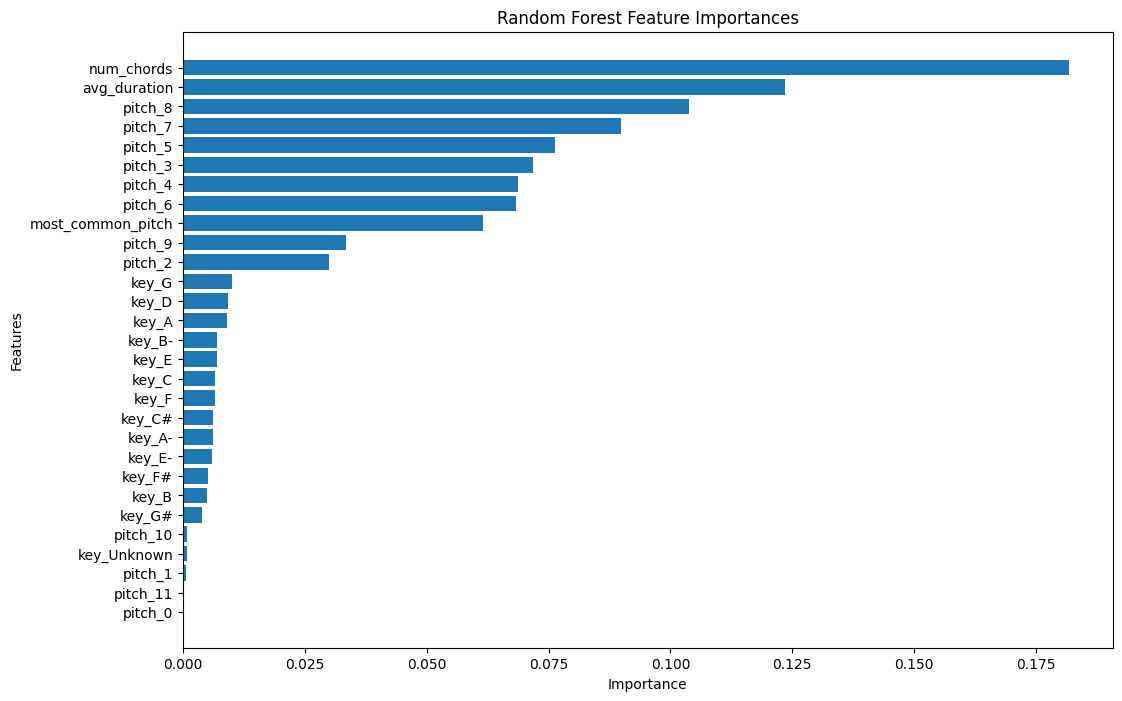

In [15]:
import matplotlib.pyplot as plt

# Plot feature importances from the trained Random Forest model
rf_feature_importances = tuned_model.feature_importances_
sorted_idx = rf_feature_importances.argsort()

plt.figure(figsize=(12, 8))
plt.barh(X.columns[sorted_idx], rf_feature_importances[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

---

## Step 14: Building and Evaluating an Ensemble Model with Voting Classifier

In this step, we built and evaluated an **ensemble model** using a Voting Classifier, which combines the predictions of multiple classifiers to improve overall performance.

### Key Tasks:

1. **Ensemble Composition**:
   - Combined three strong classifiers into the ensemble:
     - **Random Forest (RF)**: Tuned model from earlier steps.
     - **Gradient Boosting (GB)**: Gradient Boosting Classifier.
     - **Multi-Layer Perceptron (MLP)**: Neural network model.
   - Used **soft voting**, which aggregates the predicted probabilities from each model to make the final prediction.

2. **Training**:
   - Trained the ensemble model on the training dataset (`X_train`, `y_train`).

3. **Evaluation**:
   - Made predictions on the test dataset (`X_test`).
   - Calculated accuracy, precision, recall, F1-score, and generated a confusion matrix.

---

In [16]:
from sklearn.ensemble import VotingClassifier

# Ensemble of RF, GB, and MLP
ensemble_model = VotingClassifier(estimators=[
    ('rf', tuned_model),          # Random Forest
    ('gb', gb_model),             # Gradient Boosting
    ('mlp', mlp_model)            # MLP
], voting='soft')

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Metrics
ensemble_accuracy = round(accuracy_score(y_test, y_pred_ensemble) * 100)
ensemble_report = classification_report(y_test, y_pred_ensemble)
ensemble_confusion = confusion_matrix(y_test, y_pred_ensemble)

# Display results
print(f"Ensemble Accuracy: {ensemble_accuracy}%")
print("\nClassification Report:\n", ensemble_report)
print("\nConfusion Matrix:\n", ensemble_confusion)


Ensemble Accuracy: 88%

Classification Report:
               precision    recall  f1-score   support

       alkan       0.83      0.75      0.79       114
       lully       0.92      0.99      0.95       117
   scarlatti       0.91      0.94      0.93       136
    schubert       0.84      0.77      0.80       108
 tchaikovsky       0.76      0.80      0.78       116
    victoria       0.99      1.00      1.00       126

    accuracy                           0.88       717
   macro avg       0.88      0.87      0.87       717
weighted avg       0.88      0.88      0.88       717


Confusion Matrix:
 [[ 85   2   6   7  14   0]
 [  1 116   0   0   0   0]
 [  2   3 128   1   2   0]
 [  5   2   3  83  14   1]
 [  9   3   3   8  93   0]
 [  0   0   0   0   0 126]]


---
### Results:
- **Ensemble Accuracy**: **88%**

- **Classification Report**:


   | Class        | Precision | Recall | F1-Score | Support |
   |--------------|-----------|--------|----------|---------|
   | Alkan        | 0.83      | 0.75   | 0.79     | 114     |
   | Lully        | 0.92      | 0.99   | 0.95     | 117     |
   | Scarlatti    | 0.91      | 0.94   | 0.93     | 136     |
   | Schubert     | 0.84      | 0.77   | 0.80     | 108     |
   | Tchaikovsky  | 0.76      | 0.80   | 0.78     | 116     |
   | Victoria     | 0.99      | 1.00   | 1.00     | 126     |

   - **Macro Avg**: Precision = 0.88, Recall = 0.87, F1-Score = 0.87.
   - **Weighted Avg**: Precision = 0.88, Recall = 0.88, F1-Score = 0.88.


### Observations:
- The **ensemble model achieves an accuracy of 88%**, which is competitive with other individual models like Gradient Boosting (90%) and Random Forest (92%).
- **Victoria**, **Lully**, and **Scarlatti** classes continue to perform exceptionally well, with precision and recall values above 90%.
- Moderate improvement is observed in the **Alkan**, **Schubert**, and **Tchaikovsky** classes compared to their individual model performances.
- The ensemble's balanced approach combines the strengths of RF, GB, and MLP to create a robust classifier.

### Conclusion:
The Voting Classifier effectively aggregates the predictive capabilities of the individual models, providing strong performance across all classes. This demonstrates the power of ensemble learning in handling complex datasets.

---

---
## Step 15: Building and Evaluating a Stacked Ensemble Model

In this step, we implemented a **Stacking Classifier**, which combines multiple base models and uses a meta-classifier to make the final predictions. This approach leverages the strengths of each base model and improves overall predictive performance.

### Key Tasks:

1. **Base Models**:
   - **Random Forest (RF)**: Trained with `n_estimators=200` and balanced class weights.
   - **Gradient Boosting (GB)**: Trained with `n_estimators=200` and a learning rate of `0.1`.
   - **Multi-Layer Perceptron (MLP)**: Neural network with a single hidden layer of 100 neurons.

2. **Meta-Classifier**:
   - **Logistic Regression**: Used as the final estimator to aggregate the predictions from the base models.

3. **Training**:
   - Trained the Stacking Classifier using **5-fold cross-validation** on the training dataset.

4. **Evaluation**:
   - Predictions were made on the test dataset (`X_test`).
   - Accuracy, precision, recall, F1-score, and a confusion matrix were calculated to evaluate the model's performance.


---

In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Step 1: Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, random_state=42, class_weight='balanced')),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
]

# Step 2: Define the meta-classifier
meta_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Step 3: Create the Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_classifier,
    cv=5  # 5-fold cross-validation
)

# Step 4: Train the Stacking Model
stacking_model.fit(X_train, y_train)

# Step 5: Evaluate the Stacking Model
y_pred_stack = stacking_model.predict(X_test)

# Step 6: Metrics
stack_accuracy = round(accuracy_score(y_test, y_pred_stack) * 100)
stack_report = classification_report(y_test, y_pred_stack)
stack_confusion = confusion_matrix(y_test, y_pred_stack)

print(f"Stacked Ensemble Accuracy: {stack_accuracy}%")
print("\nClassification Report:\n", stack_report)
print("\nConfusion Matrix:\n", stack_confusion)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Stacked Ensemble Accuracy: 92%

Classification Report:
               precision    recall  f1-score   support

       alkan       0.92      0.78      0.84       114
       lully       0.97      0.99      0.98       117
   scarlatti       0.95      0.93      0.94       136
    schubert       0.87      0.89      0.88       108
 tchaikovsky       0.82      0.91      0.87       116
    victoria       0.99      1.00      1.00       126

    accuracy                           0.92       717
   macro avg       0.92      0.92      0.92       717
weighted avg       0.92      0.92      0.92       717


Confusion Matrix:
 [[ 89   1   3   8  13   0]
 [  1 116   0   0   0   0]
 [  5   2 127   0   2   0]
 [  1   0   2  96   8   1]
 [  1   1   2   6 106   0]
 [  0   0   0   0   0 126]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Results:

- **Stacked Ensemble Accuracy**: **92%**

- **Classification Report**:



   | Class        | Precision | Recall | F1-Score | Support |
   |--------------|-----------|--------|----------|---------|
   | Alkan        | 0.92      | 0.78   | 0.84     | 114     |
   | Lully        | 0.97      | 0.99   | 0.98     | 117     |
   | Scarlatti    | 0.95      | 0.93   | 0.94     | 136     |
   | Schubert     | 0.87      | 0.89   | 0.88     | 108     |
   | Tchaikovsky  | 0.82      | 0.91   | 0.87     | 116     |
   | Victoria     | 0.99      | 1.00   | 1.00     | 126     |

   - **Macro Avg**: Precision = 0.92, Recall = 0.92, F1-Score = 0.92.
   - **Weighted Avg**: Precision = 0.92, Recall = 0.92, F1-Score = 0.92.


   
### Observations:
- The Stacked Ensemble achieves **excellent accuracy (92%)**, which matches the performance of the Random Forest model and outperforms other models like Gradient Boosting and MLP.
- The **Tchaikovsky** and **Schubert** classes show significant improvement in recall and precision, demonstrating the effectiveness of stacking for combining model strengths.
- **Victoria** and **Lully** maintain near-perfect classification performance.

### Warnings:
- The MLP model did not converge during training within the given 500 iterations. This could potentially impact the stacking model's performance slightly.

### Conclusion:
The Stacking Classifier effectively aggregates predictions from diverse models, resulting in robust and high-performance classification. Despite the convergence warning for MLP, the overall performance remains exceptional.

---


---
## Step 16: Model Comparison and Visualization

In this step, we compared the performance of all trained models on the test dataset using metrics such as **Accuracy**, **Precision**, **Recall**, and **F1-Score**. Additionally, a bar chart was plotted to visualize the accuracy of the models.

### Key Tasks:

1. **Metrics Calculation**:
   - For each model, predictions were generated for the test dataset (`X_test`).
   - Metrics:
     - **Accuracy**: Percentage of correctly classified instances.
     - **Precision**: Measure of exactness (proportion of relevant instances among retrieved instances).
     - **Recall**: Measure of completeness (proportion of relevant instances correctly retrieved).
     - **F1-Score**: Harmonic mean of precision and recall, providing a balanced evaluation.

2. **Comparison Table**:
   - All models' performance metrics were compiled into a pandas DataFrame.
   - The models were sorted by **Accuracy** in descending order for easy comparison.

3. **Visualization**:
   - A horizontal bar chart was plotted to display the accuracy of the models, making it easier to identify the best-performing models visually.

---

                 Model  Accuracy (%)  Precision  Recall  F1-Score
0        Random Forest         92.19       0.92    0.92      0.92
7     Stacked Ensemble         92.05       0.92    0.92      0.92
1    Gradient Boosting         89.54       0.90    0.90      0.90
6      Voting Ensemble         88.01       0.88    0.88      0.88
2                  MLP         80.61       0.80    0.81      0.81
3                  SVM         79.08       0.79    0.79      0.79
4  Logistic Regression         75.17       0.74    0.75      0.74
5                 K-NN         73.08       0.72    0.73      0.72


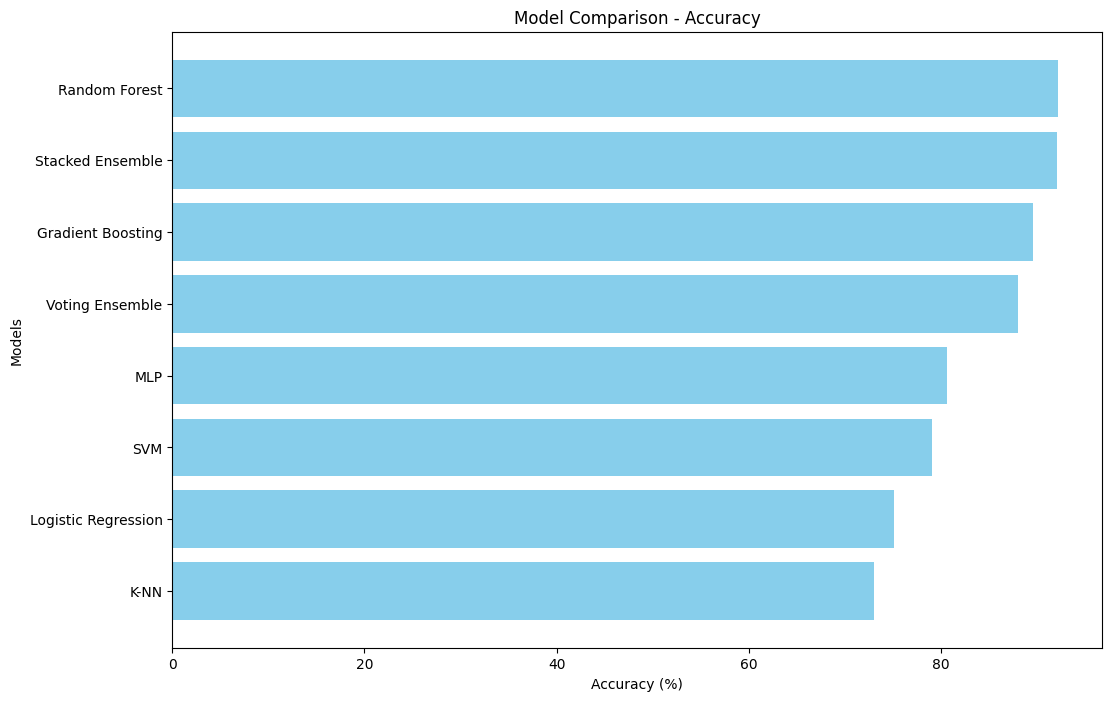

In [18]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Models and predictions
models = {
    "Random Forest": tuned_model,
    "Gradient Boosting": gb_model,
    "MLP": mlp_model,
    "SVM": best_svm,
    "Logistic Regression": best_logreg,
    "K-NN": best_knn,
    "Voting Ensemble": ensemble_model,
    "Stacked Ensemble": stacking_model
}

# Prepare comparison DataFrame
results = []

for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append results
    results.append({
        "Model": model_name,
        "Accuracy (%)": round(accuracy * 100, 2),
        "Precision": round(precision, 2),
        "Recall": round(recall, 2),
        "F1-Score": round(f1, 2)
    })

# Display the comparison table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy (%)", ascending=False)
print(results_df)

# Plot comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(results_df['Model'], results_df['Accuracy (%)'], color='skyblue')
plt.title("Model Comparison - Accuracy")
plt.xlabel("Accuracy (%)")
plt.ylabel("Models")
plt.gca().invert_yaxis()
plt.show()


---


### Results:

| Model                 | Accuracy (%) | Precision | Recall | F1-Score |
|------------------------|--------------|-----------|--------|----------|
| Random Forest          | **92.19**   | 0.92      | 0.92   | 0.92     |
| Stacked Ensemble       | **92.05**   | 0.92      | 0.92   | 0.92     |
| Gradient Boosting      | 89.54       | 0.90      | 0.90   | 0.90     |
| Voting Ensemble        | 88.01       | 0.88      | 0.88   | 0.88     |
| MLP                    | 80.61       | 0.80      | 0.81   | 0.81     |
| SVM                    | 79.08       | 0.79      | 0.79   | 0.79     |
| Logistic Regression    | 75.17       | 0.74      | 0.75   | 0.74     |
| K-NN                   | 73.08       | 0.72      | 0.73   | 0.72     |

### Observations:

- **Random Forest** and **Stacked Ensemble** were the top-performing models with an accuracy of over **92%**, followed closely by **Gradient Boosting** at **89.54%**.
- **Voting Ensemble** also demonstrated strong performance with an accuracy of **88%**.
- Models like **MLP** and **SVM** had moderate performance with accuracy values of **80.61%** and **79.08%**, respectively.
- **Logistic Regression** and **K-NN** performed comparatively lower, with accuracy values below **76%**.

### Visualization:

- A horizontal bar chart was plotted to visualize the accuracy of each model. This visualization highlights the high performance of ensemble-based models like Random Forest, Stacked Ensemble, and Gradient Boosting.

### Conclusion:

- Ensemble techniques, particularly **Random Forest** and **Stacked Ensemble**, provided the best performance, indicating their effectiveness in combining diverse model predictions.
- The visualization helps in identifying the best models at a glance, showcasing the competitive edge of ensemble approaches.

---
